## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## momentum

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3 #固定 LEARNING_RATE
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85, 0.8]
NESTEROV = True

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Momentum 的模型並訓練
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=NESTEROV, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

50000/50000 [==============================] - 3s 55us/step - loss: 2.0854 - acc: 0.2491 - val_loss: 1.9455 - val_acc: 0.3173
Epoch 2/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8904 - acc: 0.3343 - val_loss: 1.8427 - val_acc: 0.3544
Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8124 - acc: 0.3647 - val_loss: 1.7876 - val_acc: 0.3740
Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7620 - acc: 0.3839 - val_loss: 1.7447 - val_acc: 0.3885
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7227 - acc: 0.3980 - val_loss: 1.7042 - val_acc: 0.4040
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.6890 - acc: 0.4085 - val_loss: 1.6803 - val_acc: 0.4129
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6608 - acc: 0.4207 - val_loss: 1.6564 - val_acc: 0.4153
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 3s 53us/step - loss: 1.9190 - acc: 0.3270 - val_loss: 1.8743 - val_acc: 0.3437
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8464 - acc: 0.3544 - val_loss: 1.8297 - val_acc: 0.3578
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7993 - acc: 0.3717 - val_loss: 1.7780 - val_acc: 0.3749
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7617 - acc: 0.3851 - val_loss: 1.7453 - val_acc: 0.3870
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7303 - acc: 0.3944 - val_loss: 1.7197 - val_acc: 0.3946
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7026 - acc: 0.4054 - val_loss: 1.6949 - val_acc: 0.4021
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6791 - acc: 0.4128 - val_loss: 1.6858 - val_acc: 0.4013
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 53us/step - loss: 1.8933 - acc: 0.3359 - val_loss: 1.8688 - val_acc: 0.3449
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8443 - acc: 0.3532 - val_loss: 1.8251 - val_acc: 0.3644
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8085 - acc: 0.3690 - val_loss: 1.7916 - val_acc: 0.3791
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7789 - acc: 0.3806 - val_loss: 1.7673 - val_acc: 0.3877
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7538 - acc: 0.3897 - val_loss: 1.7439 - val_acc: 0.3928
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7324 - acc: 0.3970 - val_loss: 1.7237 - val_acc: 0.3997
Epoch 9/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7131 - acc: 0.4045 - val_loss: 1.7034 - val_acc: 0.4093
Epoch 10/50
50000/50000 [===========================

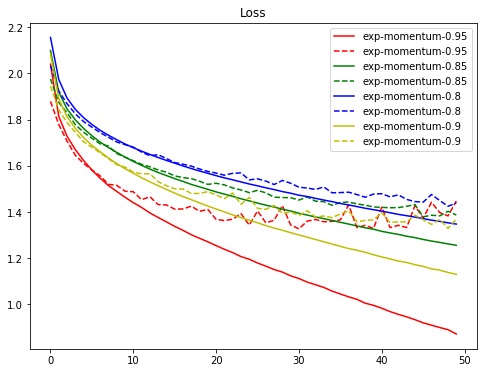

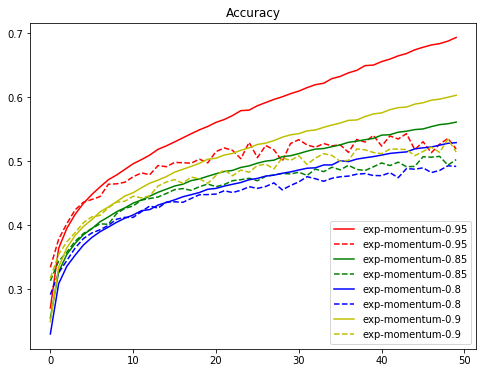

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## nesterov

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3 #固定 LEARNING_RATE
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95 #固定 MOMENTUM
NESTEROV = [True, False]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Nesterov 的模型並訓練
"""
for nes in NESTEROV:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with NESTEROV = ", nes)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nes, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-nesterov-%s" % str(nes)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with NESTEROV =  True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========================

50000/50000 [==============================] - 3s 60us/step - loss: 2.0353 - acc: 0.2688 - val_loss: 1.8539 - val_acc: 0.3502
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8057 - acc: 0.3654 - val_loss: 1.7643 - val_acc: 0.3818
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7284 - acc: 0.3887 - val_loss: 1.7001 - val_acc: 0.3955
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6713 - acc: 0.4103 - val_loss: 1.6511 - val_acc: 0.4166
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6373 - acc: 0.4212 - val_loss: 1.6216 - val_acc: 0.4253
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5931 - acc: 0.4378 - val_loss: 1.6024 - val_acc: 0.4269
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5626 - acc: 0.4480 - val_loss: 1.5446 - val_acc: 0.4567
Epoch 8/50
50000/50000 [============================

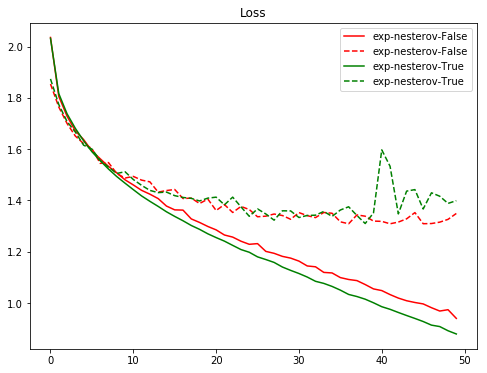

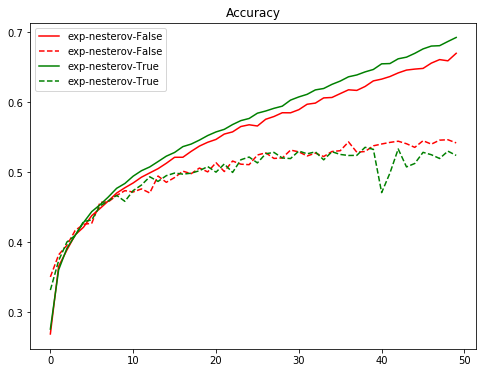

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

#### 結論:
改變 Momentum 對模型訓練影響很大.

改變 Nesterov 對模型訓練影響不大.